In [1]:
!pip install scipy
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:

# Path to your .mat files
lr_data_path = './LR_data_160.mat'
hr_data_path = './HR_data_268.mat'

# Load the data
lr_data = loadmat(lr_data_path)
hr_data = loadmat(hr_data_path)


In [3]:
# Print the keys to see what variables are inside
print("LR Data Keys:", lr_data.keys())
print("HR Data Keys:", hr_data.keys())

# Print basic information about 'LR' and 'HR' variables
print("LR Data Type:", type(lr_data['LR']))
print("LR Data Shape:", lr_data['LR'].shape)

print("HR Data Type:", type(hr_data['HR']))
print("HR Data Shape:", hr_data['HR'].shape)

# If the data types are numpy arrays and not too large, you can print a small part of them
# Adjust the slicing as needed to avoid printing too much data
print("Sample from LR Data:", lr_data['LR'][:5])  # Adjust the index range as needed
print("Sample from HR Data:", hr_data['HR'][:5])  # Adjust the index range as needed


LR Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'LR'])
HR Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'HR'])
LR Data Type: <class 'numpy.ndarray'>
LR Data Shape: (279, 12720)
HR Data Type: <class 'numpy.ndarray'>
HR Data Shape: (279, 35778)
Sample from LR Data: [[ 0.20714622 -0.04054347  0.12503607 ...  0.63710991  0.70365309
   0.60782222]
 [ 0.3908859   0.39850229  0.11586828 ...  0.64338081  0.50101241
   0.61371498]
 [ 0.65978896  0.00443189  0.07657352 ...  0.60211352  0.48951707
   0.36731095]
 [ 0.59170497  0.20461215  0.17504631 ...  0.57397573  0.39319476
   0.42591312]
 [ 0.38155641  0.00840382  0.70467227 ...  0.34827505  0.43189934
   0.39324965]]
Sample from HR Data: [[0.55897271 0.46061736 0.69920946 ... 0.38795068 0.73178632 0.82595272]
 [0.89749013 0.8184413  0.8080303  ... 0.51561432 0.63381379 0.91403309]
 [0.66005707 0.51145124 0.80126747 ... 0.45575734 0.49762593 0.75255075]
 [0.50861981 0.41432901 0.83404337 ... 0.25255113

## 0. Arrays Description

1. **Data Structure**: Both `LR` and `HR` variables are stored as NumPy arrays, which is a very flexible and powerful data structure for numerical data manipulation and analysis in Python.

2. **Data Shape**: 
   - The `LR` data has a shape of `(279, 12720)`, indicating it consists of 279 rows and 12,720 columns. This could represent 279 samples with 12,720 features each, depending on the context of your data.
   - The `HR` data has a shape of `(279, 35778)`, which suggests it also consists of 279 samples but with 35,778 features each. This implies a higher resolution or more detailed measurements compared to the `LR` data, which is consistent with the naming convention (LR for Low Resolution and HR for High Resolution).


## 1. Basic Statistics


In [4]:
lr_array = lr_data['LR']  
hr_array = hr_data['HR']  

# Define a function to calculate statistics and return them in a dictionary
def calculate_statistics(data):
    statistics = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Standard Deviation': np.std(data),
        'Min': np.min(data),
        'Max': np.max(data)
    }
    return statistics

# Calculate statistics for LR and HR data
lr_stats = calculate_statistics(lr_array)
hr_stats = calculate_statistics(hr_array)

# Create a DataFrame to hold the statistics for comparison
df_stats = pd.DataFrame({'LR Data': lr_stats, 'HR Data': hr_stats})

# Round the numbers to four decimal places for better readability
df_stats = df_stats.round(4)

df_stats


,LR Data,HR Data
Mean,0.1533,0.2252
Median,0.1483,0.2302
Standard Deviation,0.2565,0.2703
Min,-0.9886,-0.9953
Max,0.9990,0.9999


## 2. Distribution Visualization


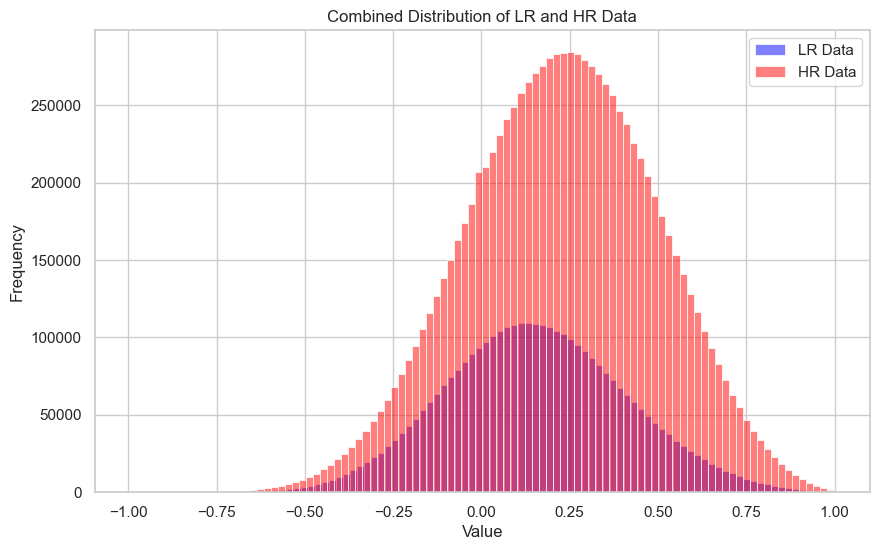

In [5]:

lr_array = lr_data['LR']  
hr_array = hr_data['HR']  

# Setting the Seaborn theme for nice aesthetics
sns.set_theme(style="whitegrid")

# Plotting histograms on the same figure for comparison
plt.figure(figsize=(10, 6))

# Making histograms semi-transparent with alpha and using a higher bin count for finer detail
sns.histplot(lr_array.flatten(), bins=100, color='blue', alpha=0.5, label='LR Data')
sns.histplot(hr_array.flatten(), bins=100, color='red', alpha=0.5, label='HR Data')

# Adding titles and labels
plt.title('Combined Distribution of LR and HR Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adding a legend to differentiate between LR and HR data
plt.legend()

plt.show()


## 3. Feature Matrix Heatmap Visualization

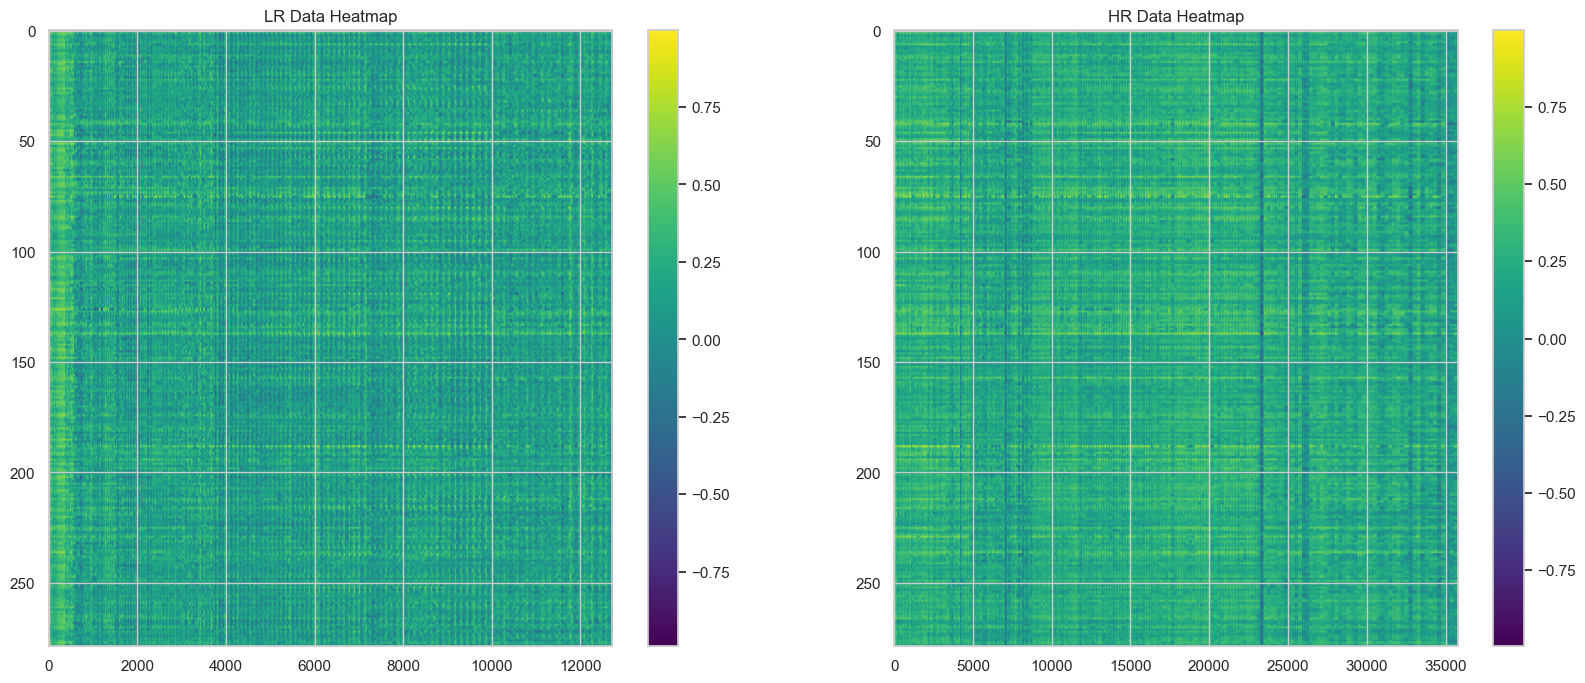

In [6]:
plt.figure(figsize=(20, 8))

# Heatmap of a subset of LR data
plt.subplot(1, 2, 1)
plt.imshow(lr_array, aspect='auto', cmap='viridis')  # Adjust subset size as needed
plt.colorbar()
plt.title('LR Data Heatmap')

# Heatmap of a subset of HR data
plt.subplot(1, 2, 2)
plt.imshow(hr_array, aspect='auto', cmap='viridis')  # Adjust subset size as needed
plt.colorbar()
plt.title('HR Data Heatmap')

plt.show()


## 4. Brain graph adjacency matrix Heatmap Visualization 

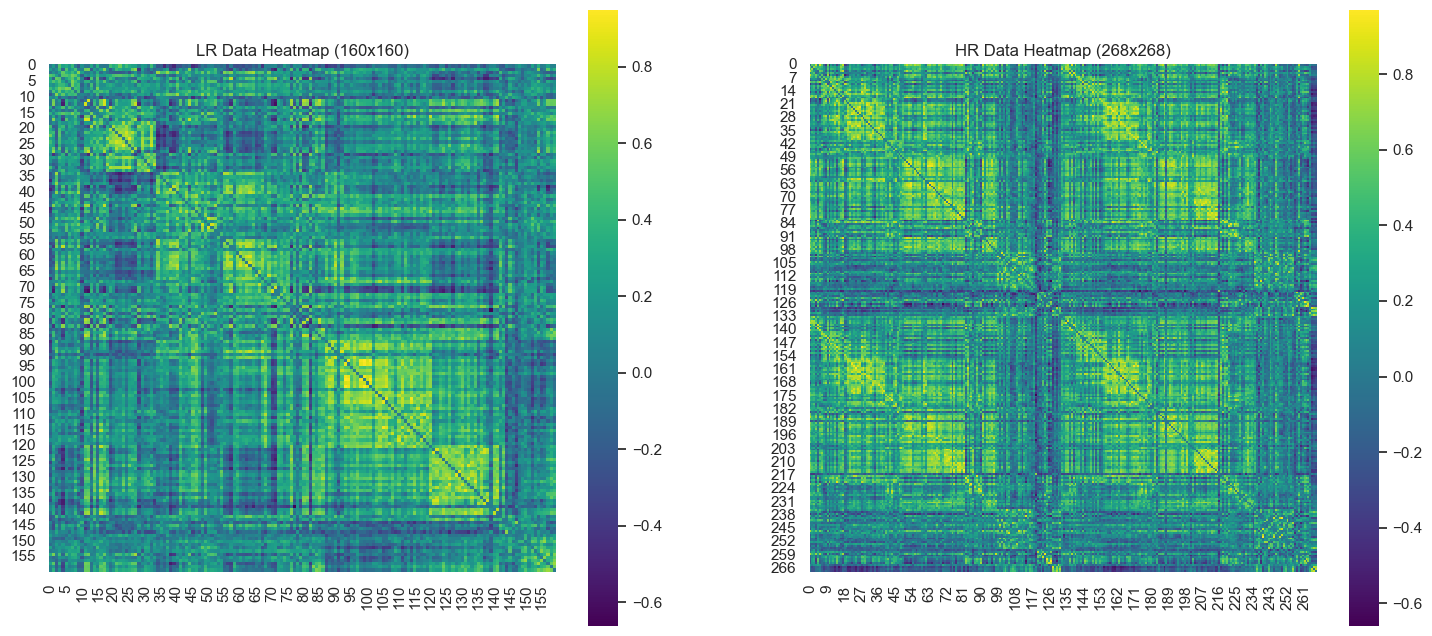

In [7]:
i = 0

import numpy as np

class MatrixVectorizer:
    def __init__(self):
        pass

    @staticmethod
    def vectorize(matrix, include_diagonal=False):
        # Determine the size of the matrix
        matrix_size = matrix.shape[0]

        # Initialize an empty list to store the vector elements
        vector_elements = []

        # Traverse the matrix column by column
        for col in range(matrix_size):
            for row in range(matrix_size):
                if row != col:  # Exclude diagonal if not including it
                    if row < col:
                        # Collect elements from the upper triangle
                        vector_elements.append(matrix[row, col])
                    elif include_diagonal and row == col + 1:
                        # Include the diagonal element immediately below the diagonal if specified
                        vector_elements.append(matrix[row, col])

        return np.array(vector_elements)

    @staticmethod
    def anti_vectorize(vector, matrix_size, include_diagonal=False):
        # Initialize the matrix with zeros
        matrix = np.zeros((matrix_size, matrix_size))

        # Counter for elements in the vector
        vector_idx = 0

        # Fill the matrix vertically, excluding the diagonal if specified
        for col in range(matrix_size):
            for row in range(matrix_size):
                if row != col:  # Skip diagonal if not including diagonal
                    if row < col:
                        # Fill in the upper triangle based on vector indexing
                        matrix[row, col] = vector[vector_idx]
                        # Reflect the value to the lower triangle
                        matrix[col, row] = vector[vector_idx]
                        vector_idx += 1
                    elif include_diagonal and row == col + 1:
                        # If including diagonal, fill it after completing each column
                        matrix[row, col] = vector[vector_idx]
                        matrix[col, row] = vector[vector_idx]
                        vector_idx += 1

        return matrix




# Now, we use the function for LR and HR data with the right flags
lr_vector = lr_data['LR'][i, :]
hr_vector = hr_data['HR'][i, :]

# Now, we use the function for LR and HR data with the right flags
lr_matrix = MatrixVectorizer.anti_vectorize(lr_vector, 160, include_diagonal=False)  
hr_matrix = MatrixVectorizer.anti_vectorize(hr_vector, 268, include_diagonal=False) 

# Plot the heatmaps
plt.figure(figsize=(18, 8))

# LR Data Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(lr_matrix, square=True, cmap='viridis')
plt.title('LR Data Heatmap (160x160)')

# HR Data Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(hr_matrix, square=True, cmap='viridis')
plt.title('HR Data Heatmap (268x268)')

plt.show()

### A Toy Example to demonestrate the innerwork of vectorization and  anti-vecotrize function

In [8]:
# Toy vector for demonstration
toy_vector = np.array([1, 2, 3, 4, 5, 6])  # This is a vectorized upper triangular part of a 4x4 matrix

# The matrix_size is 4 for our toy example
matrix_size = 4

# We call the anti_vectorize function with include_diagonal=False since we are not including the diagonal
toy_matrix = MatrixVectorizer.anti_vectorize(toy_vector, matrix_size, include_diagonal=False)

toy_matrix


array([[0., 1., 2., 4.],
       [1., 0., 3., 5.],
       [2., 3., 0., 6.],
       [4., 5., 6., 0.]])

In [9]:

vectorized_matrix = MatrixVectorizer.vectorize(toy_matrix, include_diagonal=False)

vectorized_matrix

array([1., 2., 3., 4., 5., 6.])